In [20]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split

In [21]:
dataset = pd.read_csv('product.csv',index_col=0)

In [22]:
dataset.head()

,product_id,product_name,ticker,risk_profile,one_year_return,three_year_return,five_year_return,seven_year_return,return_2011,return_2012,return_2013,return_2014,return_2015,return_2016,return_2017,return_2018,return_2019,alpha,beta
0,2202,Kyle Lowe,eqh52,4,-10.221032,-14.368294,1.993120,1.333746,5.464683,-9.139709,0.050053,-0.647418,-15.058290,5.379972,3.207111,23.891120,2.029692,-0.144702,1.232757
1,6246,Chloe Wilson,n1b7o,4,1.987912,11.772074,-4.732313,-8.503226,12.394433,1.695243,-24.606060,9.288015,-4.622258,19.542663,-11.348025,11.398257,8.281348,-0.138246,-0.827014
2,5451,Elizabeth Bennett,616mt,3,-17.638769,-10.821343,6.742186,-9.762025,-2.247076,-1.406356,0.814841,17.850618,-5.291832,3.160446,-14.856303,-4.703439,-4.427264,-0.862004,-1.105183
3,2683,Benjamin Jackson,7zx5b,4,4.459354,15.012074,4.207104,13.337127,-1.414127,-4.795866,3.788106,-28.357908,-0.398888,1.601698,-12.352087,4.643652,-5.592448,-2.459100,-0.213318
4,9467,Scott Schroeder,w3r9a,4,3.890044,-18.120924,12.401239,-10.770869,4.390951,-11.267805,-9.764854,-3.962879,18.957485,6.976644,-6.041965,-2.843102,-11.513987,-0.034160,-0.573072


In [23]:
feature_columns = ['one_year_return','three_year_return','five_year_return','seven_year_return',
                   'return_2011','return_2012','return_2013','return_2014','return_2015',
                   'return_2016','return_2017','return_2018','return_2019','alpha','beta']
X = dataset[feature_columns].values
y = dataset['risk_profile'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

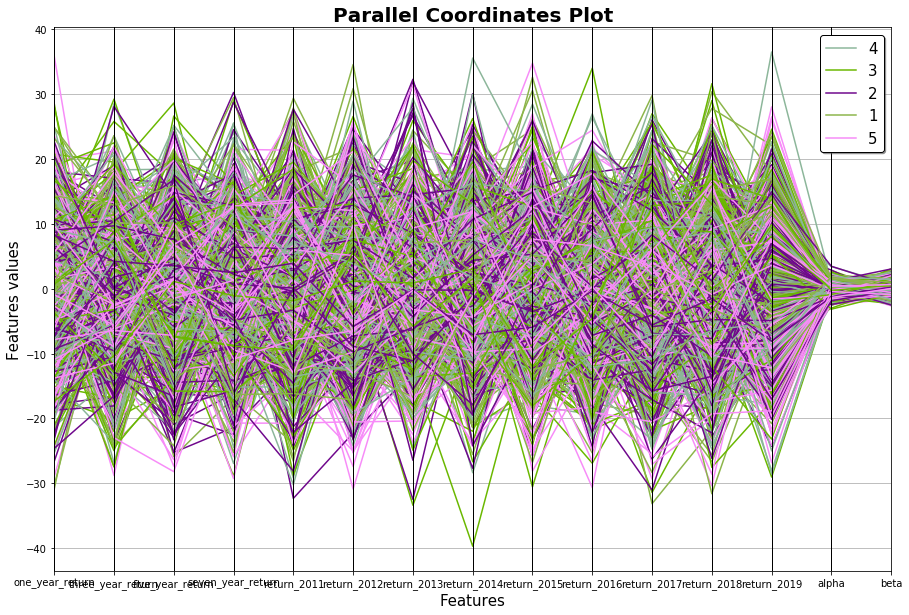

In [29]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,10))
parallel_coordinates(dataset.drop(["product_id","product_name","ticker"], axis=1), "risk_profile")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()